In [68]:
import pandas as pd
import plotnine as pn
import numpy as np

# per turn reward
# run_num = '1599461398'
# per turn, raw score reward
# run_num = '1599381355'

# end of episode score reward
# run_num = '1599461936'

# ranking reward
run_num = '1599462925'

file_ep = f'/Users/kurtsmith/research/multiagent-rl/data/tournament/dual_ultimatum/{run_num}/episodes.csv'
file_pr = f'/Users/kurtsmith/research/multiagent-rl/data/tournament/dual_ultimatum/{run_num}/progress.txt'
pd.options.display.max_columns = None

With bots taking actions:

- offer = 0.9
- threshold = 0.1

The best an agent can do is: 1.8 point per turn.
With 6 turns per episode - max points is 10.8

In [69]:
ep = pd.read_csv(file_ep)
pr = pd.read_table(file_pr)

In [27]:
ep.groupby('epoch')[['action_0_0', 'action_0_1', 'reward_0', 'score_0']].agg(['mean', 'std'])

action_0_0           action_0_1            reward_0             score_0  \
            mean       std       mean       std      mean       std      mean   
epoch                                                                           
0       0.247823  0.002856   0.577571  0.004340  1.652172  3.697452  4.131273   
1       0.202165  0.002370   0.273561  0.276626  1.697840  3.799654  4.241250   

                 
            std  
epoch            
0      2.824383  
1      2.900764

In [28]:
ep[ep.done].groupby('epoch')[['action_0_0', 'action_0_1', 'reward_0', 'score_0']].agg(['mean', 'std'])

action_0_0           action_0_1             reward_0            score_0  \
            mean       std       mean       std       mean       std     mean   
epoch                                                                           
0       0.248500  0.000000   0.578600  0.000000   9.913032  0.005907  8.26116   
1       0.198964  0.001568   0.007114  0.009685  10.187040  0.004937  8.48603   

                 
            std  
epoch            
0      0.006095  
1      0.003713

In [29]:
ep[ep.done==False].groupby('epoch')[['action_0_0', 'action_0_1', 'reward_0', 'score_0']].mean()

,action_0_0,action_0_1,reward_0,score_0
epoch,,,,
0,0.247687,0.577365,0.0,3.305296
1,0.202805,0.326851,0.0,3.392294


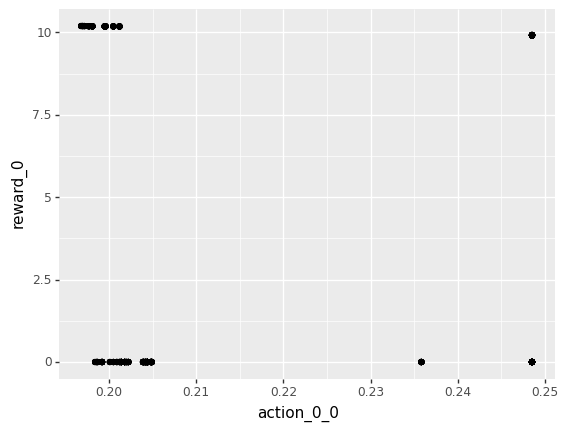

<ggplot: (8781220483087)>

In [30]:
pn.ggplot(ep, pn.aes(x='action_0_0', y='reward_0')) + pn.geom_point()

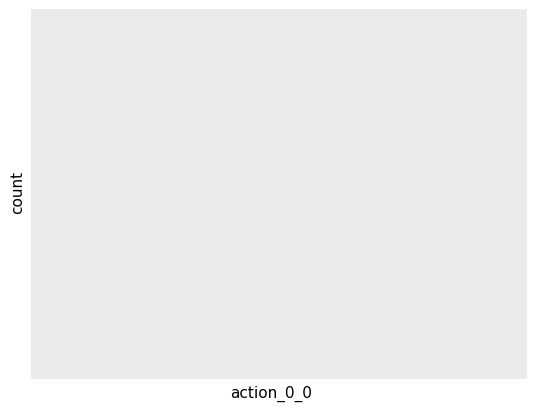

<ggplot: (8781204184875)>

In [31]:
pn.ggplot(ep[ep.epoch==4], pn.aes(x='action_0_0')) + pn.geom_histogram()

In [32]:
ep['expected_reward_0'] = 1 - ep['action_0_0'] + 0.9

In [33]:
ep.loc[ep.action_0_1<0.9, ['epoch', 'round', 'turn', 'action_0_0', 'action_0_1', 'reward_0', 'expected_reward_0', 'done']]

,epoch,round,turn,action_0_0,action_0_1,reward_0,expected_reward_0,done
0,0,2,3,0.2485,0.5786,0.0000,1.6515,False
1,0,2,2,0.2485,0.5786,0.0000,1.6515,False
2,0,2,1,0.2485,0.5786,0.0000,1.6515,False
3,0,1,3,0.2485,0.5786,0.0000,1.6515,False
4,0,1,2,0.2485,0.5786,0.0000,1.6515,False
...,...,...,...,...,...,...,...,...
1195,1,2,2,0.2048,0.6785,0.0000,1.6952,False
1196,1,2,1,0.2039,0.4229,0.0000,1.6961,False
1197,1,1,3,0.2014,0.0368,0.0000,1.6986,False
1198,1,1,2,0.2014,0.0375,0.0000,1.6986,False


In [71]:
pr

,Epoch,AverageEpRet0,StdEpRet0,MaxEpRet0,MinEpRet0,EpScore0,AverageOffer0,StdOffer0,MaxOffer0,MinOffer0,AverageThreshold0,StdThreshold0,MaxThreshold0,MinThreshold0,TestEpRet0,AverageTestEpScore0,StdTestEpScore0,MaxTestEpScore0,MinTestEpScore0,AverageTestOffer0,StdTestOffer0,MaxTestOffer0,MinTestOffer0,AverageTestThreshold0,StdTestThreshold0,MaxTestThreshold0,MinTestThreshold0,AverageQVals,StdQVals,MaxQVals,MinQVals,LossPi,LossQ,Time
0,0,0.990396,0.097527,1.0,0.0,7.295670,0.680153,0.113973,1.0,0.250966,0.497417,0.143806,0.968417,0.091608,1.0,7.220573,9.536743e-07,7.220572,7.220572,0.696571,0.000000e+00,0.696571,0.696571,0.314993,0.000000e+00,0.314993,0.314993,0.673974,0.352629,1.186960,-0.213453,-0.675912,0.003806,45.520174
1,1,1.000000,0.000000,1.0,1.0,7.385101,0.669115,0.100749,1.0,0.288832,0.263873,0.099581,0.611377,0.000000,1.0,7.520398,4.768372e-07,7.520398,7.520398,0.646600,0.000000e+00,0.646600,0.646600,0.240172,0.000000e+00,0.240172,0.240172,0.972116,0.043775,1.056659,-0.304067,-0.974233,0.000456,93.429878
2,2,0.997599,0.048941,1.0,0.0,7.234282,0.694358,0.112267,1.0,0.288283,0.164040,0.100911,0.564748,0.000000,1.0,6.274914,4.768372e-07,6.274914,6.274914,0.854181,0.000000e+00,0.854181,0.854181,0.107229,0.000000e+00,0.107229,0.107229,0.975440,0.031928,1.065394,-0.361850,-0.976336,0.000197,139.427381
3,3,0.971189,0.167276,1.0,0.0,6.889331,0.751705,0.115851,1.0,0.276562,0.071658,0.076032,0.463039,0.000000,1.0,7.790351,0.000000e+00,7.790351,7.790351,0.601608,5.960464e-08,0.601608,0.601608,0.034469,3.725290e-09,0.034469,0.034469,0.975031,0.044541,1.119518,-0.678791,-0.977088,0.000456,187.206984


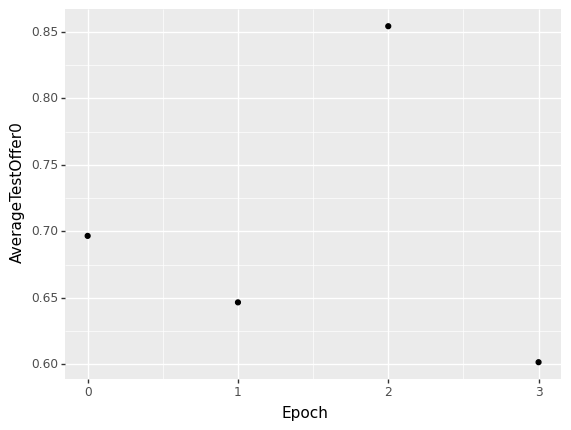

<ggplot: (8781220491661)>

In [72]:
pn.ggplot(pr, pn.aes(x='Epoch', y='AverageTestOffer0')) + pn.geom_point()

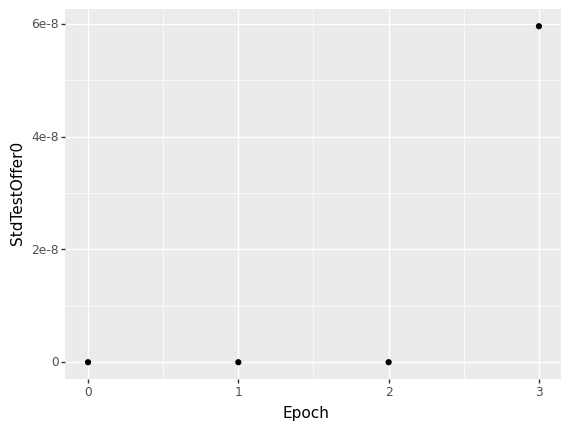

<ggplot: (-9223363255684989703)>

In [73]:
pn.ggplot(pr, pn.aes(x='Epoch', y='StdTestOffer0')) + pn.geom_point()

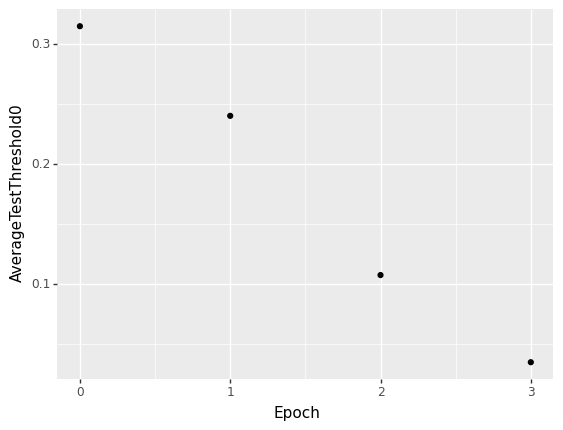

<ggplot: (8781035488218)>

In [74]:
pn.ggplot(pr, pn.aes(x='Epoch', y='AverageTestThreshold0')) + pn.geom_point()

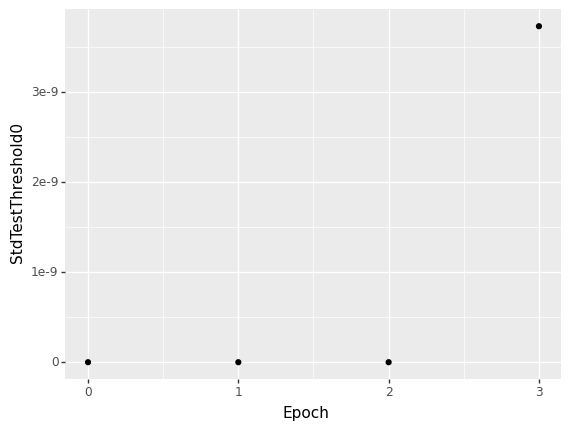

<ggplot: (-9223363255819299061)>

In [75]:
pn.ggplot(pr, pn.aes(x='Epoch', y='StdTestThreshold0')) + pn.geom_point()

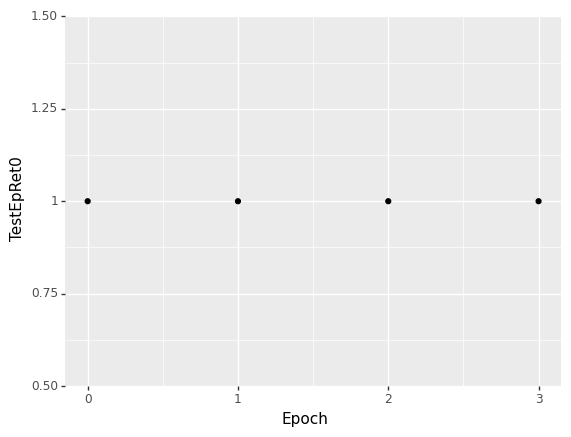

<ggplot: (8781204281285)>

In [78]:
pn.ggplot(pr, pn.aes(x='Epoch', y='TestEpRet0')) + pn.geom_point()

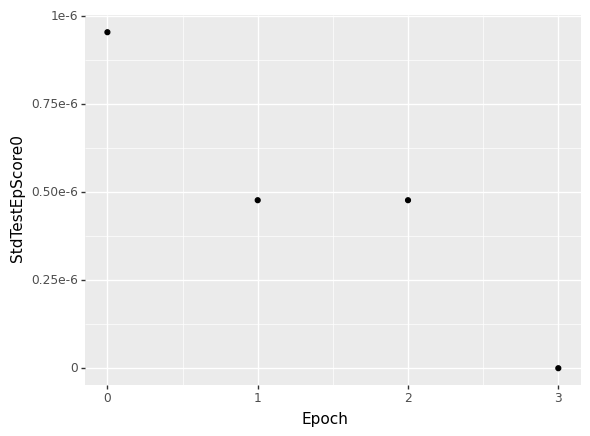

<ggplot: (-9223363255768945166)>

In [77]:
pn.ggplot(pr, pn.aes(x='Epoch', y='StdTestEpScore0')) + pn.geom_point()